In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('loan.xlsx')

In [2]:
pd.set_option('display.max_columns', 200)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,0.837,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,0.094,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,0.985,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,0.210,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
cols = df.columns.tolist()

In [5]:
X = df.loc[:, ['funded_amnt', 'term', 'int_rate','grade', 
               'emp_length', 'home_ownership', 'annual_inc', 
               'verification_status']].values
y = df.loc[:, ['loan_status']].values

In [6]:
y

array([['Fully Paid'],
       ['Charged Off'],
       ['Fully Paid'],
       ...,
       ['Fully Paid'],
       ['Fully Paid'],
       ['Fully Paid']], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [8]:
labelencoder_X_2 = LabelEncoder()
y[:, 0] = labelencoder_X_2.fit_transform(y[:, 0])

In [9]:
labelencoder_X_2.inverse_transform([0,1,2])

array(['Charged Off', 'Current', 'Fully Paid'], dtype=object)

In [10]:
onehotencoder = OneHotEncoder(categorical_features = [0])
y= onehotencoder.fit_transform(y).toarray()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [11]:
onehotencoder.get_feature_names()

array(['x0_0.0', 'x0_1.0', 'x0_2.0'], dtype=object)

In [12]:
X

array([[5000, 0, 0.1065, ..., 'RENT', 24000.0, 'Verified'],
       [2500, 1, 0.1527, ..., 'RENT', 30000.0, 'Source Verified'],
       [2400, 0, 0.1596, ..., 'RENT', 12252.0, 'Not Verified'],
       ...,
       [5000, 0, 0.0807, ..., 'MORTGAGE', 100000.0, 'Not Verified'],
       [5000, 0, 0.0743, ..., 'MORTGAGE', 200000.0, 'Not Verified'],
       [7500, 0, 0.1375, ..., 'OWN', 22000.0, 'Not Verified']],
      dtype=object)

In [13]:
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])

In [14]:
import numpy as np
#X[323][4] = X[323][4].replace('nan', 'not')

In [15]:
#X[:][4] = X[:][4].astype(str)

for i in range(X.shape[0]):
    a = X[i][4]
    #print(type(a))
    #print(i)
    if (type(a) == np.float):
        X[i][4] = 'not'
    else:
        X[i][4] = a.replace("<", "smaller")
labelencoder_X_4 = LabelEncoder()
X[:, 4] = labelencoder_X_4.fit_transform(X[:, 4])


In [16]:
X[27600][4]

10

In [17]:
labelencoder_X_5 = LabelEncoder()
X[:, 5] = labelencoder_X_5.fit_transform(X[:, 5])

In [18]:
labelencoder_X_7 = LabelEncoder()
X[:, 7] = labelencoder_X_7.fit_transform(X[:, 7])

In [19]:
np.unique(X[:, 4])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype=object)

In [20]:
onehotencoder = OneHotEncoder(categorical_features = [1])

In [21]:
X= onehotencoder.fit_transform(X).toarray()



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [22]:
X

array([[1.0000e+00, 0.0000e+00, 5.0000e+03, ..., 4.0000e+00, 2.4000e+04,
        2.0000e+00],
       [0.0000e+00, 1.0000e+00, 2.5000e+03, ..., 4.0000e+00, 3.0000e+04,
        1.0000e+00],
       [1.0000e+00, 0.0000e+00, 2.4000e+03, ..., 4.0000e+00, 1.2252e+04,
        0.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 5.0000e+03, ..., 0.0000e+00, 1.0000e+05,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 5.0000e+03, ..., 0.0000e+00, 2.0000e+05,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 7.5000e+03, ..., 3.0000e+00, 2.2000e+04,
        0.0000e+00]])

In [23]:
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [24]:
onehotencoder = OneHotEncoder(categorical_features = [4])
X = onehotencoder.fit_transform(X).toarray()


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [25]:
onehotencoder = OneHotEncoder(categorical_features = [5])
X = onehotencoder.fit_transform(X).toarray()


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [26]:
onehotencoder = OneHotEncoder(categorical_features = [7])
X = onehotencoder.fit_transform(X).toarray()


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_test.shape

(9930, 17)

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [45]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = 17))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 20)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=17, units=10, kernel_initializer="uniform")`
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100, kernel_initializer="uniform")`
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3, kernel_initializer="uniform")`
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
37731/37731 [==============================] - 5s 136us/step - loss: 0.8701 - acc: 0.8265
Epoch 2/20
37731/37731 [==============================] - 4s 107us/step - loss: 0.5359 - acc: 0.8290
Epoch 3/20
37731/37731 [==============================] - 4s 100us/step - loss: 0.5360 - acc: 0.8290
Epoch 4/20
37731/37731 [==============================] - 4s 100us/step - loss: 0.5360 - acc: 0.8290
Epoch 5/20
37731/37731 [==============================] - 4s 102us/step - loss: 0.5361 - acc: 0.8290
Epoch 6/20
37731/37731 [==============================] - 4s 100us/step - loss: 0.5357 - acc: 0.8290
Epoch 7/20
37731/37731 [==============================] - 4s 103us/step - loss: 0.5355 - acc: 0.8290
Epoch 8/20
37731/37731 [==============================] - 4s 100us/step - loss: 0.5358 - acc: 0.8290
Epoch 9/20
37731/37731 [==============================] - 4s 100us/step - loss: 0.5356 - acc: 0.8290
Epoch 10/20
37731/37731 [==============================] - 4s 101us/step - loss: 0.5357 - a

In [49]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                180       
_________________________________________________________________
dense_21 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 303       
Total params: 1,583
Trainable params: 1,583
Non-trainable params: 0
_________________________________________________________________


In [46]:
y_pred = classifier.predict(X_test)
y_pred 

array([[0.1395155 , 0.03469979, 0.82578474],
       [0.1395155 , 0.03469979, 0.82578474],
       [0.1395155 , 0.03469979, 0.82578474],
       ...,
       [0.1395155 , 0.03469979, 0.82578474],
       [0.1395155 , 0.03469979, 0.82578474],
       [0.1395155 , 0.03469979, 0.82578474]], dtype=float32)

In [47]:
av_y_pred = []
av_y_test = []
for i in range(len(y_pred)):
    av = max(y_pred[i])
    cool = np.where(y_pred[i] ==av)[0][0]
    av_y_pred.append(cool)
    
    av = max(y_test[i])
    cool = np.where(y_test[i] ==av)[0][0]
    av_y_test.append(cool)

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(av_y_test, av_y_pred)
cmb

array([[   0,    0,  262],
       [   0,    0,   53],
       [   0,    0, 1671]])

### Since there are less examples of 'Charged Off', 'Current', Therefore the accuracy of those is less

### See Figure Below---

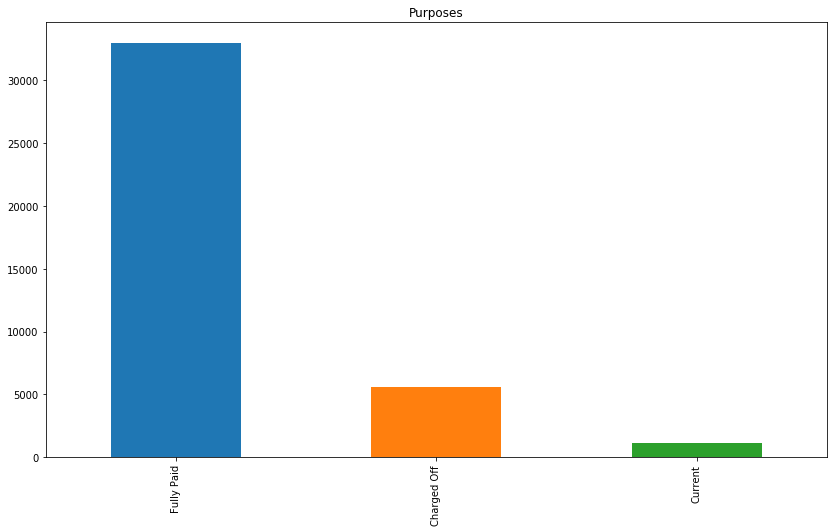

In [50]:
ax = df['loan_status'].value_counts().plot( kind='bar',
                                        figsize=(14,8),
                                        title="Purposes")

<BarContainer object of 39717 artists>

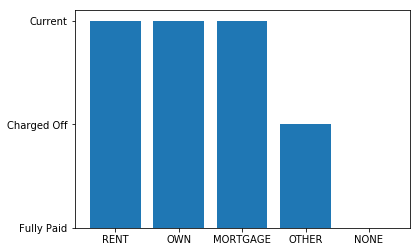

In [11]:
plt.bar(df.home_ownership, df.loan_status)

In [41]:
home_ownership_col = df.home_ownership.unique()
home_ownership_col

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [68]:
home_ownership_count = list(df.home_ownership.value_counts())
home_ownership_count
#grouped = df.groupby(df.home_ownership).nunique()
#grouped

[18899, 17659, 3058, 98, 3]

([<matplotlib.patches.Wedge at 0x13e487c50>,
 [Text(0.08340537434977371, 1.0968334164902045, 'RENT'),
  Text(-0.35204328787196065, -1.04214467492009, 'OWN'),
  Text(1.063630552540946, -0.2805174641647865, 'MORTGAGE'),
  Text(1.0999627808818055, -0.009048794105597568, 'OTHER'),
  Text(1.0999999690482423, -0.00026094801451396983, 'NONE')])

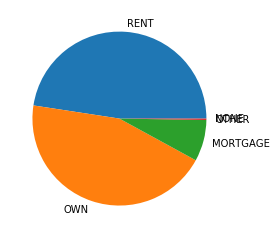

In [69]:
plt.pie(home_ownership_count, labels = home_ownership_col)

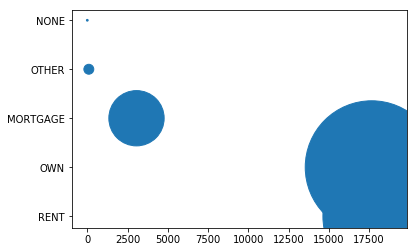

In [70]:
plt.scatter(home_ownership_count, home_ownership_col, s = av)


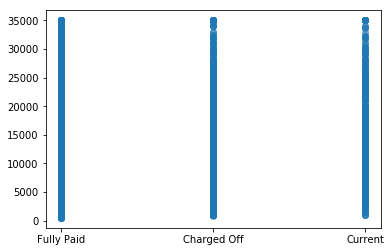

In [72]:
plt.scatter(df.loan_status,df.funded_amnt, alpha =0.5)

TypeError: unhashable type: 'numpy.ndarray'

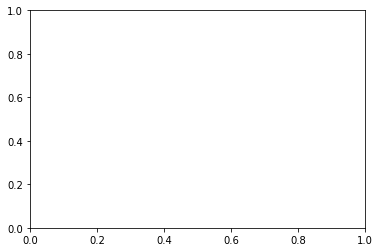

In [81]:
plt.scatter(df.groupby(df.loan_status), df.funded_amnt)

In [83]:
sns.catplot(x="emp_length",y="loan_status",data=df)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [84]:
df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

<BarContainer object of 39717 artists>

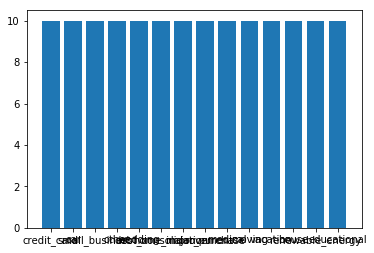

In [86]:
plt.bar(df.purpose, height = 10)

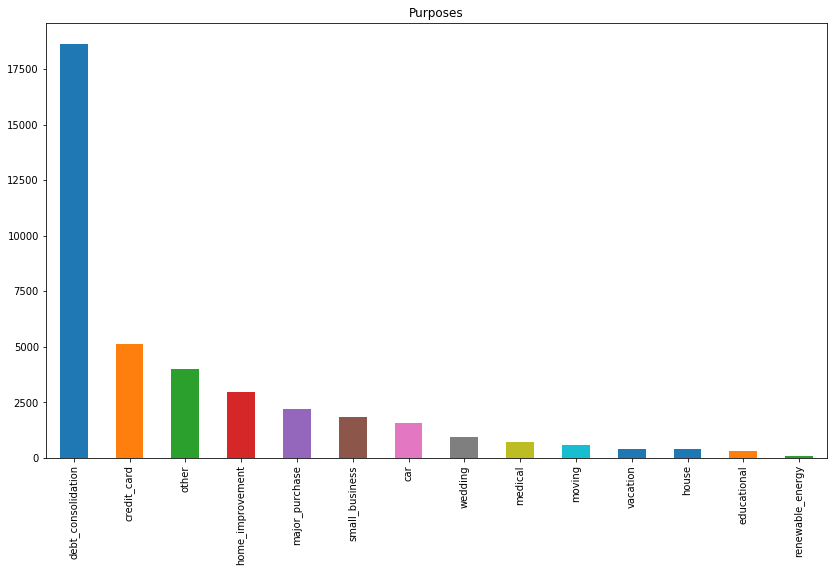

In [87]:
ax = df['purpose'].value_counts().plot( kind='bar',
                                        figsize=(14,8),
                                        title="Purposes")

In [89]:
ax = df.groupby('purpose').value_counts().plot( kind='bar',
                                        figsize=(14,8),
                                        title="Purposes")

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [94]:
ax = df['purpose'].value_counts().plot( kind='line',
                                        figsize=(14,8),
                                        title="Purposes")

KeyError: 'purpose'

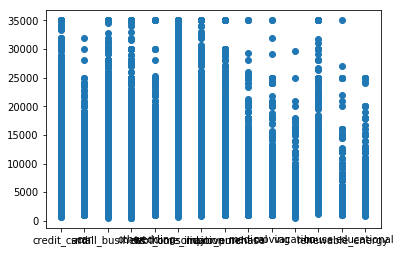

In [92]:
plt.scatter(x = 'purpose', y= 'funded_amnt', data = df)

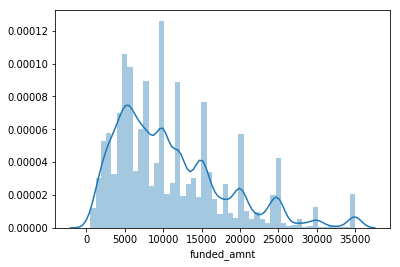

In [95]:
sns.distplot(df.funded_amnt)

In [97]:
av = df.purpose.unique()
for i in av:
    val = df['funded_amnt'](df['purpose']== av)
    val.distplot(val)

ValueError: Lengths must match to compare

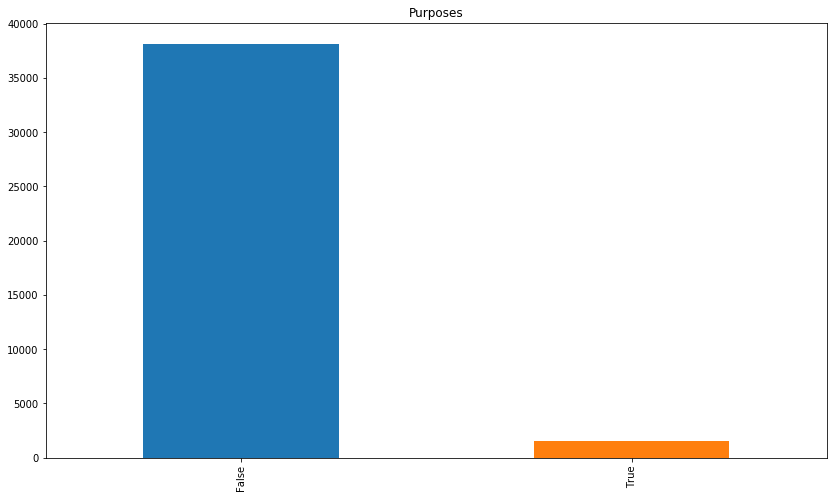

In [118]:
val = (df['purpose']== 'car').value_counts().plot( kind='bar',
                                        figsize=(14,8),
                                        title="Purposes")

In [119]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,0.837,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,0.094,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,0.985,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,0.210,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

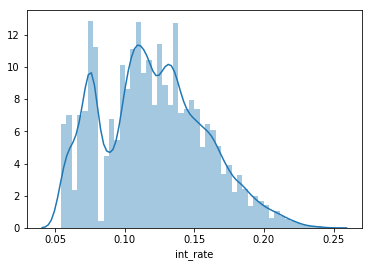

In [120]:
sns.distplot(df.int_rate)

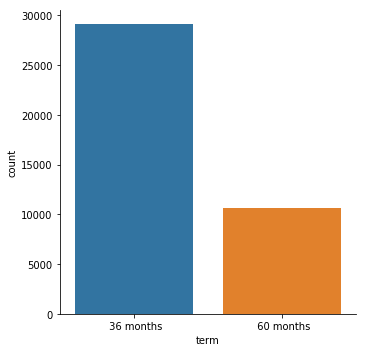

In [122]:
ax = sns.catplot(x='term',kind='count',data=df,orient="h")

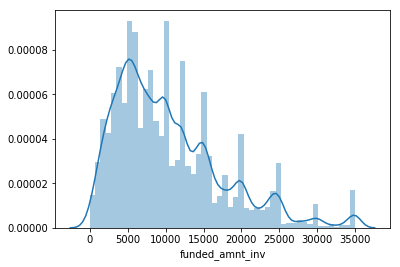

In [123]:
sns.distplot(df.funded_amnt_inv)

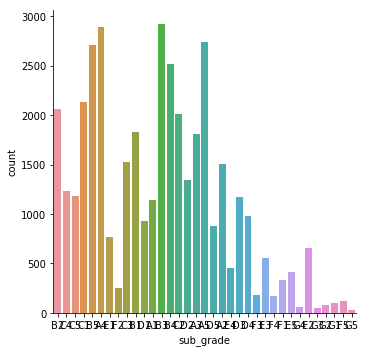

In [133]:
ax = sns.catplot(x='sub_grade',kind='count',data=df,orient="h")

In [ ]:
ax = sns.catplot(x='grade',kind='count',data=df,orient="h")

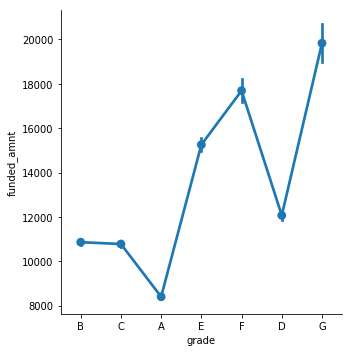

In [132]:
sns.catplot(x='grade',
            y='funded_amnt',
           # hue='City',
            kind='point',data=df)

In [139]:
av = df['funded_amnt_inv'][df['sub_grade']== 'B2']

In [140]:
av.head()

0      4975.0
14    10000.0
35    12400.0
47    10000.0
52     7000.0
Name: funded_amnt_inv, dtype: float64

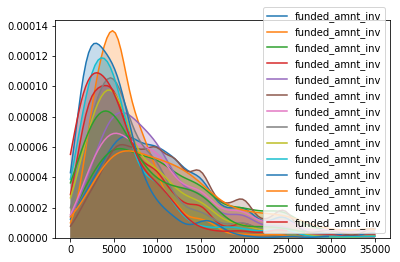

In [143]:
av = df.purpose.unique()
for i in av:
    g = df['funded_amnt_inv'][df['purpose']== i] 
    sns.kdeplot(g, shade=True, cut=0, legend= True)

In [170]:
sns.set(rc={'figure.figsize':(10.7,8.27)})

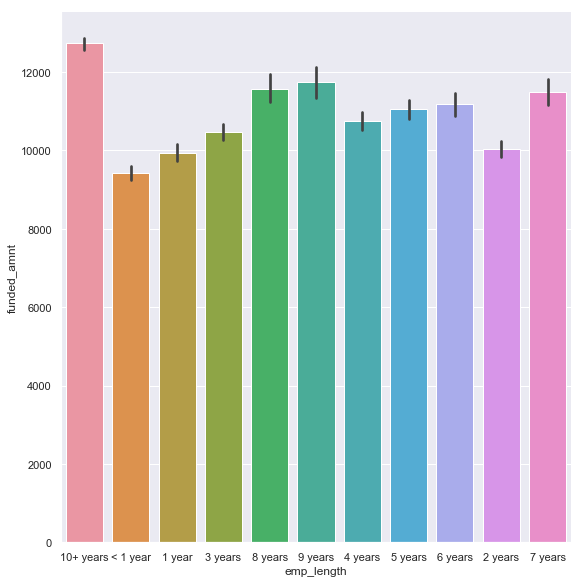

In [155]:
sns.catplot(x='emp_length',
            y='funded_amnt',
           # hue='City',
            kind='bar',data=df,height=8.27)
#plt.plot(df.emp_length, df.funded_amnt)

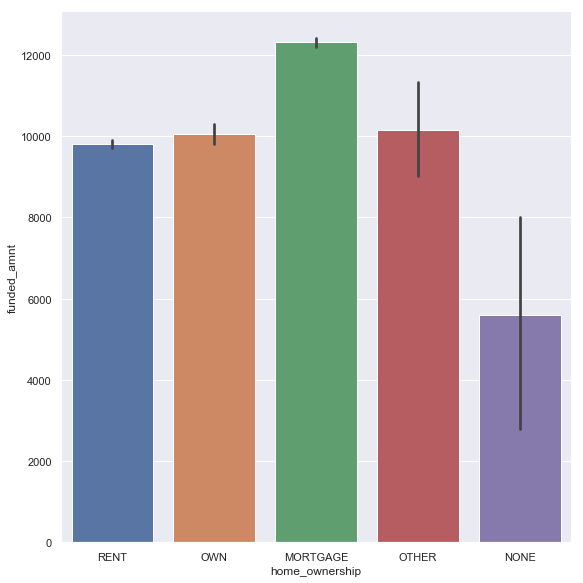

In [156]:
sns.catplot(x='home_ownership',
            y='funded_amnt',
           # hue='City',
            kind='bar',data=df,height=8.27)

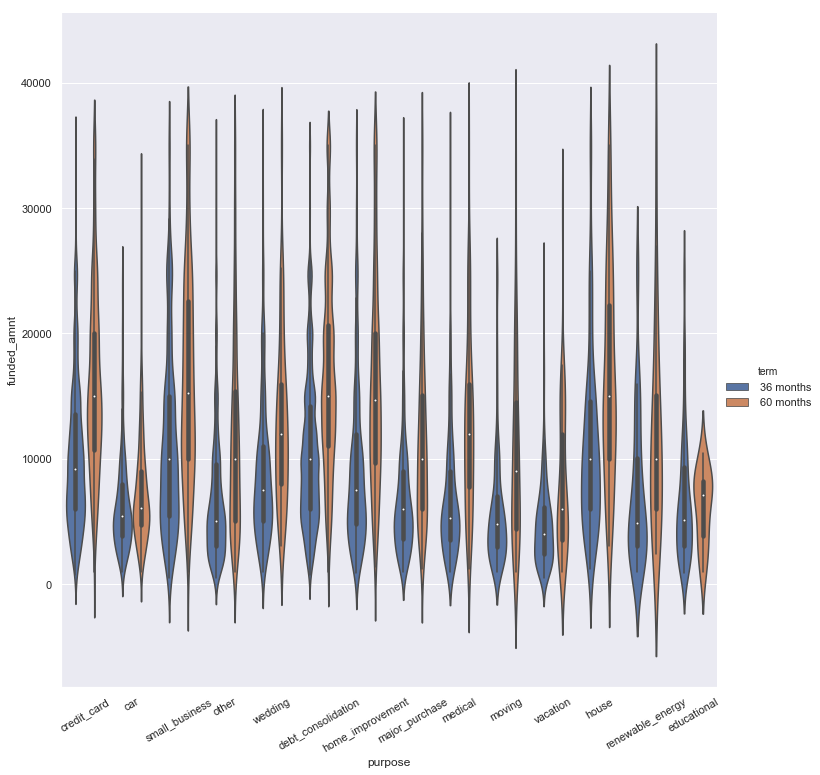

In [162]:
g = sns.catplot(x="purpose", y="funded_amnt", hue="term",
              data=df, kind="violin", height=10.27)
g.set_xticklabels(rotation=30)

In [164]:
len(df.emp_title.unique())

28821

In [168]:
plt.rcParams['agg.path.chunksize'] = 10000

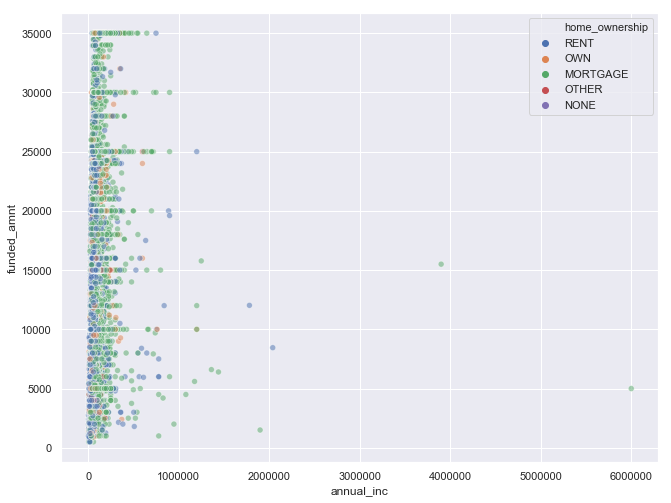

In [181]:
sns.scatterplot(df.annual_inc, df.funded_amnt ,hue ='home_ownership',data = df ,alpha=0.5)

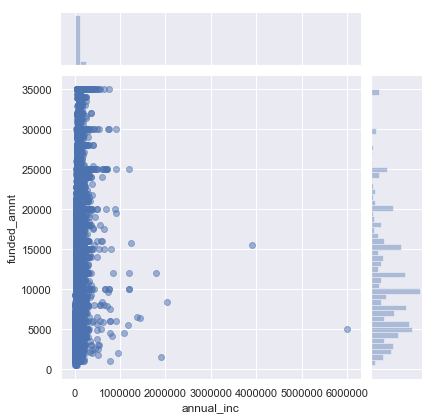

In [183]:
sns.jointplot(df.annual_inc, df.funded_amnt ,data = df ,alpha=0.5)

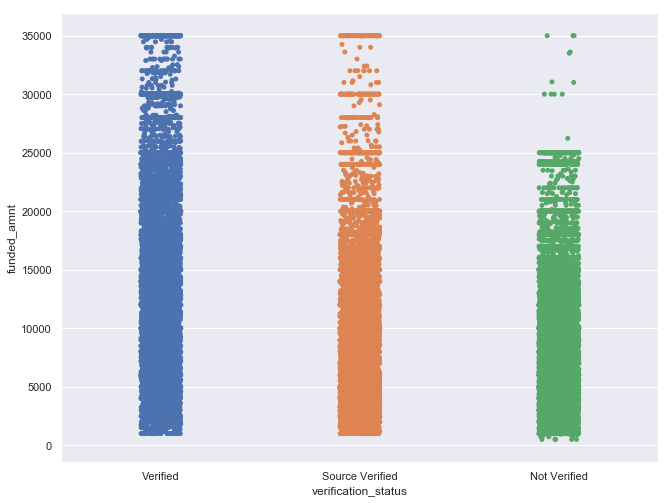

In [188]:
ax = sns.stripplot(x="verification_status", y="funded_amnt", data=df, jitter=True)


In [ ]:
sns.pairplot(df, hue = 'loan_status')

KeyboardInterrupt: 